# Objetivos
Ahora, el reto esta en poner en practica lo aprendido hasta ahora. Para esto, se te sugiere realizar el análisis de los registros Afganos, de forma similar a lo realizado con la información de la composición familiar en Liverpool. <br>
Por supuesto que estos son datasets muy diferentes, que reflejan realidades distintas. <br>
Sin embargo, la estructura de estos es reativamente similar: ambas capturarn conteos agregados, ya sea por unidades espaciales (vecindarios) o temporales (meses), y a su vez cada conteo se encuentra dividido en categorias
    
Este dataset tiene la información de el número de bajas en la guerra, los cuales se encuentran divididos en facciones: talibanes, fuerzas afganas, civiles y NATO. Las cuales se encuentran capturadas  de forma mensual, desde el año 2004 hasta el año 2009.
    
Apartir de tos datos trata de responder las siguientes preguntas:
    
- Obten el número mínimo de bajas civiles ( ¿en qué mes paso esto?)
- ¿Cuántos bajas Nato registro en agosto de 2008?
- ¿Cuál es el mes que tiene el mayor número de bajas?
- ¿Puedes hacer una grafica de la distribución de las bajas a lo largo del tiempo?

In [6]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import seaborn as sns  # This allows us to efficiently and beautifully plot

In [2]:
# Gudarmos la url en la que viene la información\n",
url = ("https://docs.google.com/spreadsheets/d/"\
       "1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/"\
       "export?format=csv&gid=1")
url

'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1'

In [7]:
# Cargamos a un df la información de los damnificados afganos, usamos el comando skiprows para no tomar el cuenta la primera y ultima fila de los datos, ya que estos contienen el titulo de la tabla y otra información no relevante
db = pd.read_csv(url, skiprows=[0, -1], thousands=",")
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15.0,51,23.0,NaN,11.0
1,2004.0,February,NaN,7,4.0,5.0,2.0
2,2004.0,March,19.0,2,NaN,2.0,3.0
3,2004.0,April,5.0,3,19.0,NaN,3.0
4,2004.0,May,18.0,29,56.0,6.0,9.0


Al visualizar la base de datos podemos apreciar la forma en la que estos se encuentran capturados em la que cada fila corresponde a una fecha, la cual se encuentra separada en dos columnas (año y mes) en la que cada una contiene información del número de bajas por facción. <br>\n",
    "Además de esto podemos apreciar que dentro de los datos podemos encontrar varios campos en los que se tiene el valor NaN (Not a Number) los cuales los manejaremos como 0 para los fines de este trabajo"

In [8]:
# Visualicemos el tipo de dato en cada columna
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           73 non-null     object 
 2   Taliban                         72 non-null     float64
 3   Civilians                       73 non-null     int64  
 4   Afghan forces                   71 non-null     float64
 5   Nato (detailed in spreadsheet)  67 non-null     float64
 6   Nato - official figures         72 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.1+ KB


In [9]:
# Contamos el númeto de nulos/NaN en cada columna\n",
db.isnull().sum()

Year                              1
Month                             0
Taliban                           1
Civilians                         0
Afghan forces                     2
Nato (detailed in spreadsheet)    6
Nato - official figures           1
dtype: int64

In [10]:
# Remplezamos NaN con 0
db = db.fillna(0)

In [12]:
# Comprobamos la presencia de nulos
db.isnull().sum()

Year                              0
Month                             0
Taliban                           0
Civilians                         0
Afghan forces                     0
Nato (detailed in spreadsheet)    0
Nato - official figures           0
dtype: int64

In [13]:
# Estadisticos básicos de cada columna para obtener un poco de información de las variables\n",
db.describe()

,Year,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1979.013699,424.849315,110.246575,104.657534,31.424658,19.589041
std,234.849272,1801.776867,466.486357,442.659740,133.499679,17.708155
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,2005.000000,48.000000,26.000000,19.000000,3.000000,6.000000
50%,2006.000000,161.000000,49.000000,49.000000,13.000000,17.000000
75%,2008.000000,325.000000,76.000000,73.000000,23.000000,27.000000
max,2009.000000,15507.000000,4024.000000,3820.000000,1147.000000,77.000000


In [14]:
# Al ver los estádisticos nos percatamos que en la columna de año se tiene un valor minimo de 0, lo cual es un poco raro, procedamos a visualizar los valores únicos de esta columna\n",
db.Year.unique()

array([2004., 2005., 2006., 2007., 2008., 2009.,    0.])

In [15]:
# Aprovechando, procedamos a visualizar la columna que contiene el mes, la cual evidentemente tiene un valor erroneo de 24498\n",
db.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', '24498'],
      dtype=object)

In [16]:
# Procedamos a eliminar la fila en la que el año es igual a 0, ya que al no tener este registro, no nos sirve esa información\n",
db = db[(db[['Year']] != 0).all(axis=1)]

In [17]:
# Comprobamos los valores únicos dentro de la columna de interes
db.Year.unique()

array([2004., 2005., 2006., 2007., 2008., 2009.])

In [18]:
# Procedemos a eliminar el valor erroneo en la columna de Month\n",
db = db[db.Month != 24498]
# Comprobamos los valores en la columna\n",
print (db.Month.unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [20]:
# Casteamos el valor de año a integral, ya que al visualizarlo parece tener decimales\n",
db["Year"] = db["Year"].astype(int)
# Visualizamos\n",
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15.0,51,23.0,0.0,11.0
1,2004,February,0.0,7,4.0,5.0,2.0
2,2004,March,19.0,2,0.0,2.0,3.0
3,2004,April,5.0,3,19.0,0.0,3.0
4,2004,May,18.0,29,56.0,6.0,9.0


In [21]:
# Creamos una columna nueva en la que se unira la información de año y mes\n",
db["date"] = db["Month"] +", "+ db["Year"].astype(str)
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,date
0,2004,January,15.0,51,23.0,0.0,11.0,"January, 2004"
1,2004,February,0.0,7,4.0,5.0,2.0,"February, 2004"
2,2004,March,19.0,2,0.0,2.0,3.0,"March, 2004"
3,2004,April,5.0,3,19.0,0.0,3.0,"April, 2004"
4,2004,May,18.0,29,56.0,6.0,9.0,"May, 2004"


In [22]:
# Pasamos la columna date al formato de timestamp, lo que permitira trabajar de forma más eficiente en caso de querererlo\n",
db["date"] = pd.to_datetime(db['date'], format="%B, %Y")

# data[\"Time\"]= pd.to_datetime(data[\"Time\"]) 

In [23]:
# Visualicemos el tipo de dato en cada columna para comprobar las acciones anterioes\n",
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Year                            72 non-null     int32         
 1   Month                           72 non-null     object        
 2   Taliban                         72 non-null     float64       
 3   Civilians                       72 non-null     int64         
 4   Afghan forces                   72 non-null     float64       
 5   Nato (detailed in spreadsheet)  72 non-null     float64       
 6   Nato - official figures         72 non-null     float64       
 7   date                            72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 4.8+ KB


In [24]:
# Visualizamos nuestros datos\n",
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,date
0,2004,January,15.0,51,23.0,0.0,11.0,2004-01-01
1,2004,February,0.0,7,4.0,5.0,2.0,2004-02-01
2,2004,March,19.0,2,0.0,2.0,3.0,2004-03-01
3,2004,April,5.0,3,19.0,0.0,3.0,2004-04-01
4,2004,May,18.0,29,56.0,6.0,9.0,2004-05-01


In [26]:
# Empecemos creando una nueva columna en la que se tenga la sumatoria del total de bajas\n",
db['Total'] = db['Taliban'] + db['Civilians'] + db['Afghan forces'] + db['Nato (detailed in spreadsheet)'] + db['Nato - official figures']

db['Total'] = db['Total'].astype(int)
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,date,Total
0,2004,January,15.0,51,23.0,0.0,11.0,2004-01-01,100
1,2004,February,0.0,7,4.0,5.0,2.0,2004-02-01,18
2,2004,March,19.0,2,0.0,2.0,3.0,2004-03-01,26
3,2004,April,5.0,3,19.0,0.0,3.0,2004-04-01,30
4,2004,May,18.0,29,56.0,6.0,9.0,2004-05-01,118


Antes de empezar plenamente, necesitamos order nuestros datos, al igual que se nos recomienda en la sección de Tidy Data, en la que nuestra información debe considerar las siguientes tres cualidades:
- Cada variable forma una columna\n",
- Cada observación corresponde a una fila\n",
- Cada medida de observación forma una tabla

In [27]:
# Empecemos creando una tabla nueva en la que tengamos la información exclusivamente de la fecha y el total de bajas\n",
total = db[['date','Total']]
# Establecemos la columna date como índice
total = total.set_index('date')
# Visualizamos
total.head()

,Total
date,
2004-01-01,100
2004-02-01,18
2004-03-01,26
2004-04-01,30
2004-05-01,118


In [28]:
# Ahora, creamos una nueva tabla en la que se tendrá la información desagregada del número de bajas\n",
desagregada = db[['date','Taliban', 'Civilians', 'Afghan forces', 'Nato (detailed in spreadsheet)','Nato - official figures']]
# Establecemos la columna date como índice
desagregada = desagregada.set_index('date')
# Visualizamos",
desagregada.head()

,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
date,,,,,
2004-01-01,15.0,51,23.0,0.0,11.0
2004-02-01,0.0,7,4.0,5.0,2.0
2004-03-01,19.0,2,0.0,2.0,3.0
2004-04-01,5.0,3,19.0,0.0,3.0
2004-05-01,18.0,29,56.0,6.0,9.0


In [29]:
# ya que se tiene estanueva tabla, apreciamos que esta tabla no cumple con uno de los requerimientos de \"datos ordenados\", ya que en cen una fila se tienen varias observaciones, correspondientes  a la facción en la que se dio esta baja, procesamos a cambiar esto\n",
# Usamos el método stack para agrupar las columnas
agrupado = desagregada.stack()
# Visualizamos
agrupado.head()

date                                      
2004-01-01  Taliban                           15.0
            Civilians                         51.0
            Afghan forces                     23.0
            Nato (detailed in spreadsheet)     0.0
            Nato - official figures           11.0
dtype: float64

In [30]:
# Reiniciamos el índice del dataframe para tener una visualizamos más aproximada  una tabla\n",
agrupado = agrupado.reset_index()
agrupado.head()

,date,level_1,0
0,2004-01-01,Taliban,15.0
1,2004-01-01,Civilians,51.0
2,2004-01-01,Afghan forces,23.0
3,2004-01-01,Nato (detailed in spreadsheet),0.0
4,2004-01-01,Nato - official figures,11.0


In [31]:
# Renombramos los encabezados de las columnas para tener una mejor comprensión de los datos
agrupado = agrupado.rename(columns={'level_1': 'Subgroup', 0: 'Freq'})
agrupado.head()

,date,Subgroup,Freq
0,2004-01-01,Taliban,15.0
1,2004-01-01,Civilians,51.0
2,2004-01-01,Afghan forces,23.0
3,2004-01-01,Nato (detailed in spreadsheet),0.0
4,2004-01-01,Nato - official figures,11.0


### Ahora, ya se tiene la stablas listas para trabajar y responder las cuestiones presentadas al principio de este notebook
# - Obten el número mínimo de bajas civiles ( ¿en qué mes paso esto?)

In [32]:
# Empecemos a obtener los datos que se nos solicita en esta practica\n",
# Para obtener el número mínimo de bajas, trabajaremos con la tabla de agrupado, ya que esta tiene la información desagregada del número de bajas\n",

# De la tabla agrupado seleccionamos el valor mínimo donde el subgrupo sea Civilians\n",
agrupado.query('Subgroup == "Civilians"').min()

date        2004-01-01 00:00:00
Subgroup              Civilians
Freq                          2
dtype: object

Con esto obtenemos que el mes en el que se presnetaron menos bajas civiles fue en enero del 2004, esto con dos sucesos registrados por las bases de datos afganas

# - ¿Cuántos bajas Nato registro en agosto de 2008?

In [34]:
# De la tabla agrupado seleccionamos la fecha de agosto de 2008 y hacemos el filtro por el subgrupo de Nato\n",
agrupado.query('Subgroup in ["Nato (detailed in spreadsheet)", "Nato - official figures"] & date == "2008-08"')

,date,Subgroup,Freq
278,2008-08-01,Nato (detailed in spreadsheet),46.0
279,2008-08-01,Nato - official figures,46.0


En Agosto de 2008 se resgistraron 46 bajas de Nato

# - ¿Cuál es el mes que tiene el mayor número de bajas?

In [35]:
# Para esta pregunta se usara la tabla de total
total.loc[total['Total'].idxmax()]

Total    1271
Name: 2006-09-01 00:00:00, dtype: int32

El mes que tiene mayor número de muertos es Septiembre de 2006 con 1271 bajas

# - ¿Puedes hacer una grafica de la distribución de las bajas a lo largo del tiempo?

In [36]:
# Ordenamos los valores del dataframe total por fecha\n",
total = total.sort_values(['date'])
total.head()

,Total
date,
2004-01-01,100
2004-02-01,18
2004-03-01,26
2004-04-01,30
2004-05-01,118


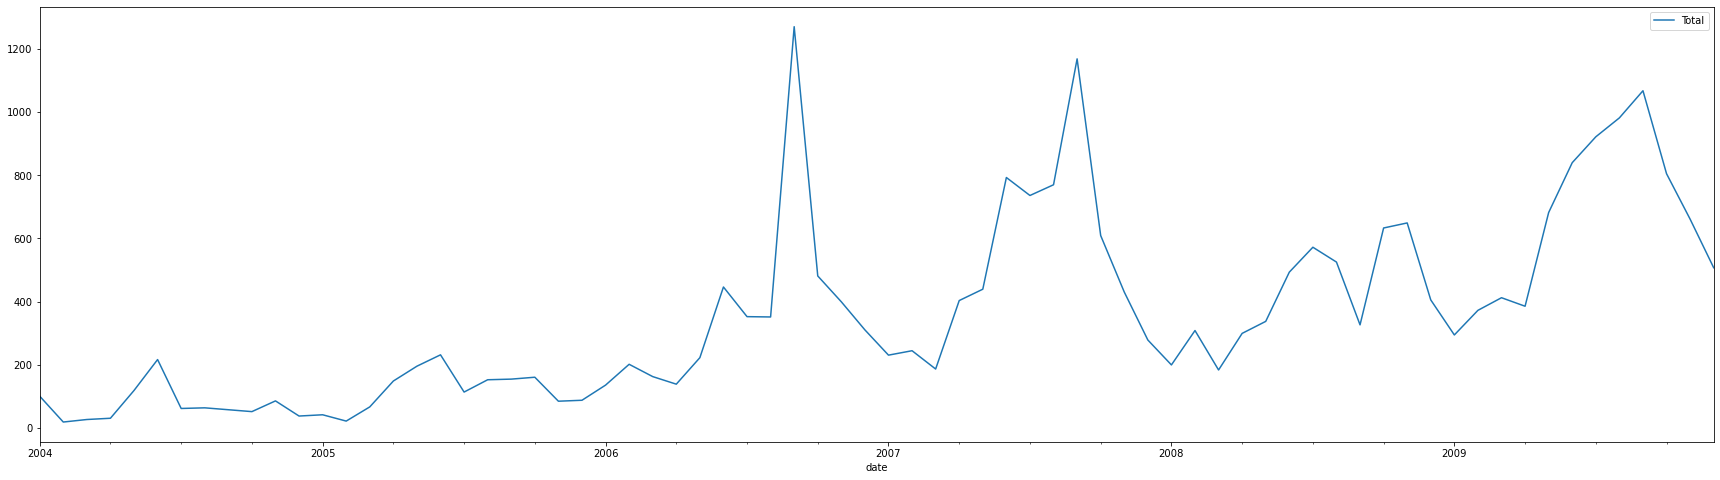

In [37]:
# Graficamos la columna total, usando como índice la fecha\n",
total['Total'].plot(use_index=True, legend=True,figsize=(30,8))

Con esta gráfica podemos apreciar el desarrollo del conflicto a lo largo de los 5 años en los que se captura la información, en la que se aprecian ciertas fechas con grandes incrementos en el número de bajas, además de un constante crecimiento a lo largo de los años